<a href="https://colab.research.google.com/github/phanee16/Shipping/blob/main/Shipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc,avg
from pyspark.sql.functions import year, month, dayofmonth, count,to_date,date_format,sum
from pyspark.ml.feature import StringIndexer, VectorAssembler
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create SparkSession
spark = SparkSession.builder.appName('pyspark_ml').getOrCreate()

# Set configuration parameter to use legacy date parser
spark.conf.set('spark.sql.legacy.timeParserPolicy', 'LEGACY')

# Load dataset
data = spark.read.csv('SCMS_Delivery_History_Dataset.csv', header=True, inferSchema=True)



In [ ]:
# pip install pyspark

In [ ]:
# Show first 5 rows
data.show(5)



+---+------------+--------------+---------+--------+-------------+----------+-----------+----------------+-------------+----------------------------+----------------------+-----------------------+------------------------+----------------------+-------------+------------------+--------------------+--------------------+--------------------+---------+-------+---------------+--------------------------+------------------+---------------+----------+----------+--------------------+----------------------+------------------+------------------+-------------------------+
| ID|Project Code|          PQ #|PO / SO #|ASN/DN #|      Country|Managed By|Fulfill Via|Vendor INCO Term|Shipment Mode|PQ First Sent to Client Date|PO Sent to Vendor Date|Scheduled Delivery Date|Delivered to Client Date|Delivery Recorded Date|Product Group|Sub Classification|              Vendor|    Item Description|  Molecule/Test Type|    Brand| Dosage|    Dosage Form|Unit of Measure (Per Pack)|Line Item Quantity|Line Item Val

In [ ]:
# Print schema
data.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Project Code: string (nullable = true)
 |-- PQ #: string (nullable = true)
 |-- PO / SO #: string (nullable = true)
 |-- ASN/DN #: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Managed By: string (nullable = true)
 |-- Fulfill Via: string (nullable = true)
 |-- Vendor INCO Term: string (nullable = true)
 |-- Shipment Mode: string (nullable = true)
 |-- PQ First Sent to Client Date: string (nullable = true)
 |-- PO Sent to Vendor Date: string (nullable = true)
 |-- Scheduled Delivery Date: string (nullable = true)
 |-- Delivered to Client Date: string (nullable = true)
 |-- Delivery Recorded Date: string (nullable = true)
 |-- Product Group: string (nullable = true)
 |-- Sub Classification: string (nullable = true)
 |-- Vendor: string (nullable = true)
 |-- Item Description: string (nullable = true)
 |-- Molecule/Test Type: string (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Dosage: string (nullable = tru

In [ ]:
data.columns

['ID',
 'Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)']

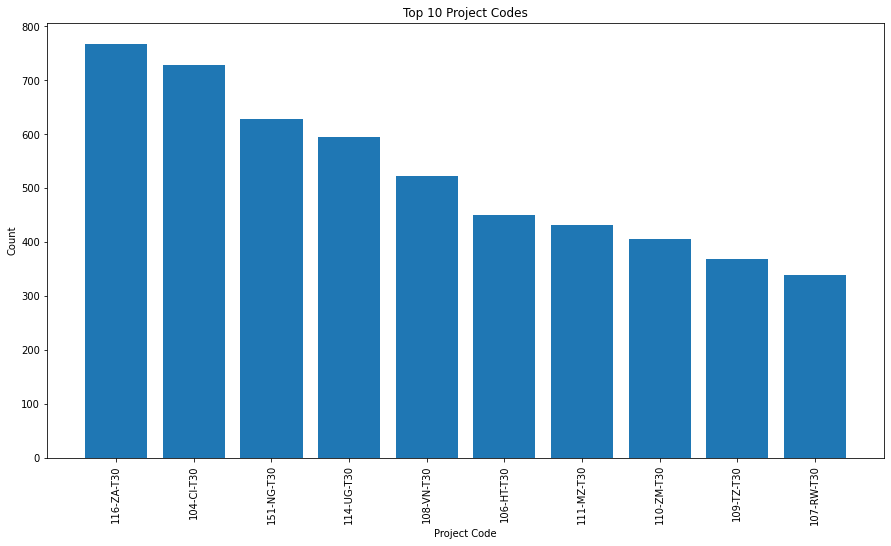

In [ ]:
# Bar plot of project codes
project_counts = data.groupBy('Project Code').count().orderBy('count', ascending=False).limit(10)
project_labels = [row[0] for row in project_counts.collect()]
project_values = [row[1] for row in project_counts.collect()]
plt.figure(figsize=(15,8))
plt.bar(project_labels, project_values)
plt.xticks(rotation=90)
plt.title('Top 10 Project Codes')
plt.xlabel('Project Code')
plt.ylabel('Count')
plt.show()


In [ ]:
# Data exploration


# Describe numeric columns
data.select('Line Item Quantity', 'Line Item Value', 'Unit of Measure (Per Pack)').describe().show()

# Count the number of missing values in each column
missing_values = data.select([count(col(c).isNull().cast('int')).alias(c) for c in data.columns])
missing_values.show()



+-------+------------------+------------------+--------------------------+
|summary|Line Item Quantity|   Line Item Value|Unit of Measure (Per Pack)|
+-------+------------------+------------------+--------------------------+
|  count|             10324|             10324|                     10324|
|   mean|18332.534870205345| 157650.5673469586|         77.99089500193723|
| stddev| 40035.30296149493|345292.06697883876|         76.57976396144102|
|    min|                 1|               0.0|                         1|
|    max|            619999|         5951990.4|                      1000|
+-------+------------------+------------------+--------------------------+

+-----+------------+-----+---------+--------+-------+----------+-----------+----------------+-------------+----------------------------+----------------------+-----------------------+------------------------+----------------------+-------------+------------------+------+----------------+------------------+-----+------+----

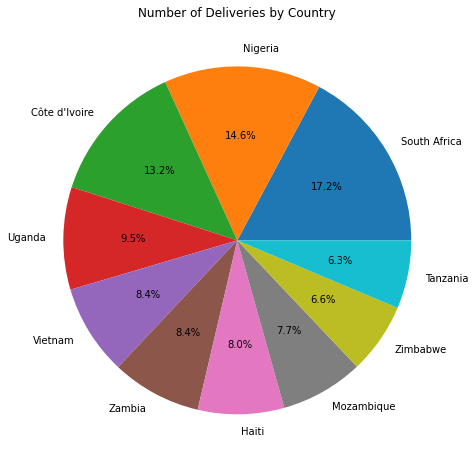

In [40]:

# Create a pie chart of the number of deliveries by country
country_counts = data.groupBy("Country").count().orderBy("count", ascending=False).limit(10).toPandas()

plt.figure(figsize=(10, 8))
plt.pie(country_counts['count'], labels=country_counts['Country'], autopct='%1.1f%%')
plt.title('Number of Deliveries by Country')
plt.show()

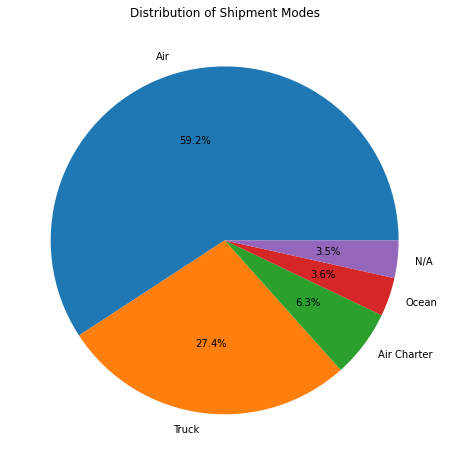

In [42]:
# Get the distribution of Shipment Mode
shipment_mode_counts = data.groupBy("Shipment Mode").count().orderBy("count", ascending=False).limit(10).toPandas()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(shipment_mode_counts['count'], labels=shipment_mode_counts['Shipment Mode'], autopct='%1.1f%%')
plt.title('Distribution of Shipment Modes')
plt.show()

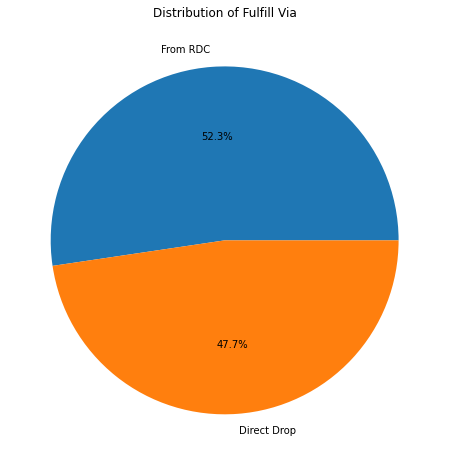

In [43]:
# Get the distribution of Fulfill Via
fulfill_via_counts = data.groupBy("Fulfill Via").count().orderBy("count", ascending=False).limit(10).toPandas()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(fulfill_via_counts['count'], labels=fulfill_via_counts['Fulfill Via'], autopct='%1.1f%%')
plt.title('Distribution of Fulfill Via')
plt.show()

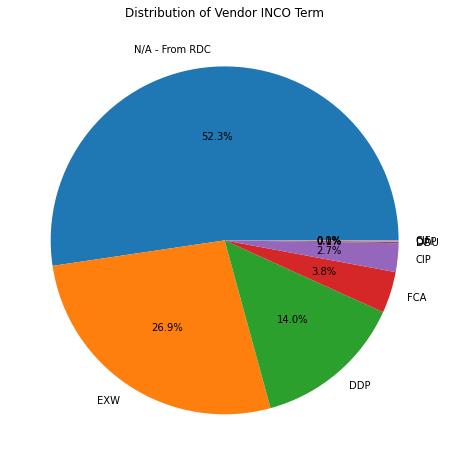

In [44]:
# Get the distribution of Vendor INCO Term
vendor_inco_term_counts = data.groupBy("Vendor INCO Term").count().orderBy("count", ascending=False).limit(10).toPandas()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(vendor_inco_term_counts['count'], labels=vendor_inco_term_counts['Vendor INCO Term'], autopct='%1.1f%%')
plt.title('Distribution of Vendor INCO Term')
plt.show()

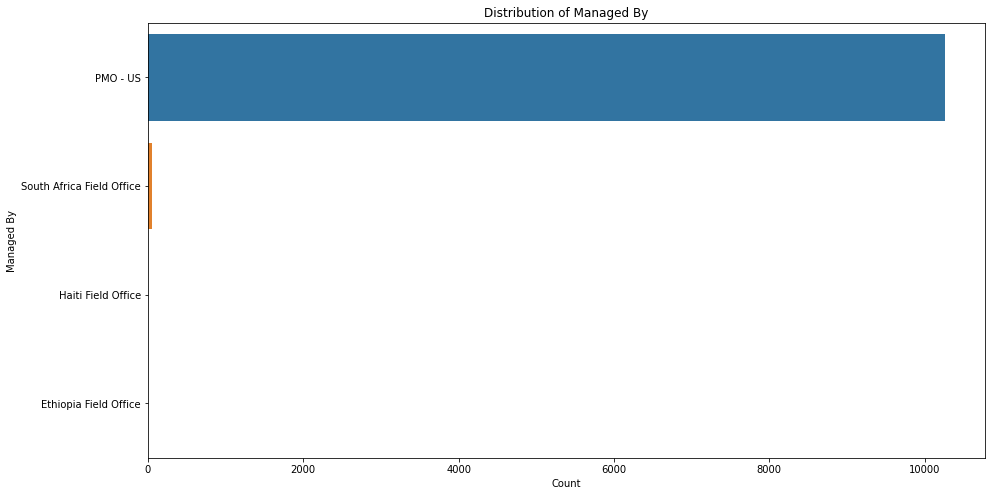

In [47]:
# Get the distribution of Managed By
managed_by_counts = data.groupBy("Managed By").count().orderBy("count", ascending=False).limit(10).toPandas()

# Plot the horizontal bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='count', y='Managed By', data=managed_by_counts)
plt.title('Distribution of Managed By')
plt.xlabel('Count')
plt.ylabel('Managed By')
plt.show()


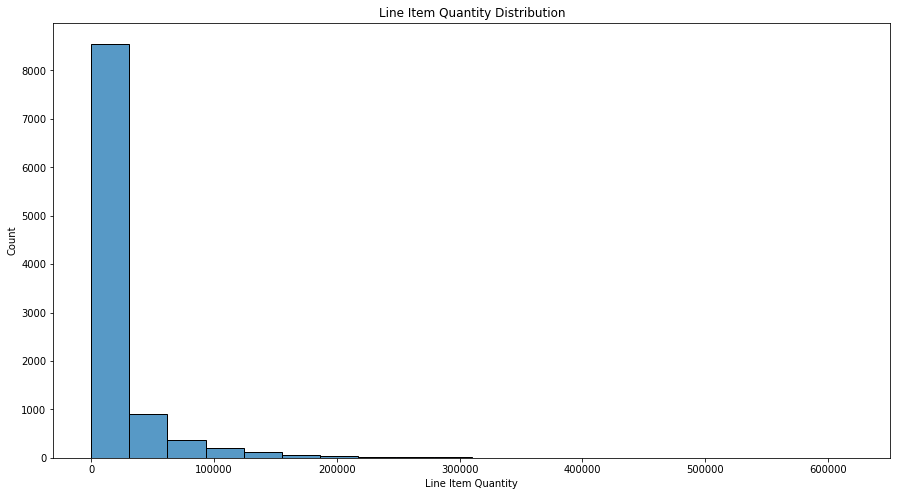

In [ ]:
# Create a histogram of the line item quantity
plt.figure(figsize=(15,8))
sns.histplot(data.toPandas(), x='Line Item Quantity', bins=20)
plt.title('Line Item Quantity Distribution')
plt.show()

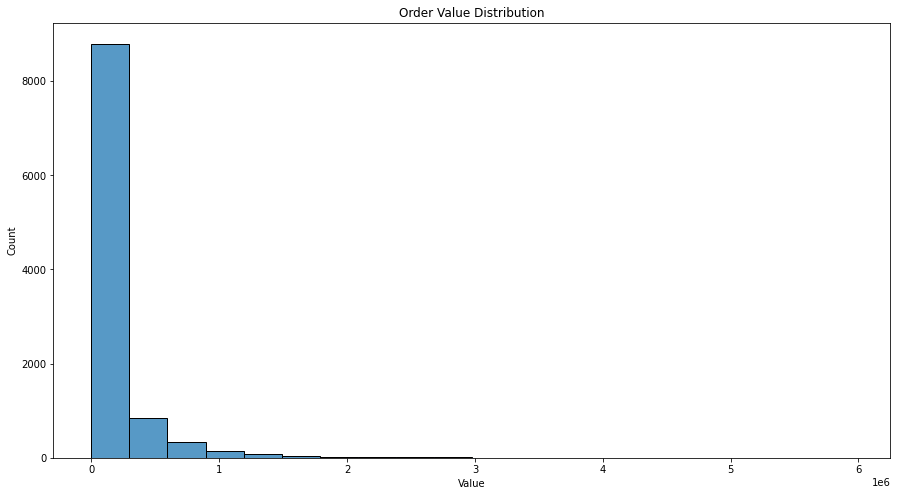

In [ ]:
# Visualize order value distribution
plt.figure(figsize=(15,8))
sns.histplot(data.toPandas(), x='Line Item Value', bins=20)
plt.title('Order Value Distribution')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

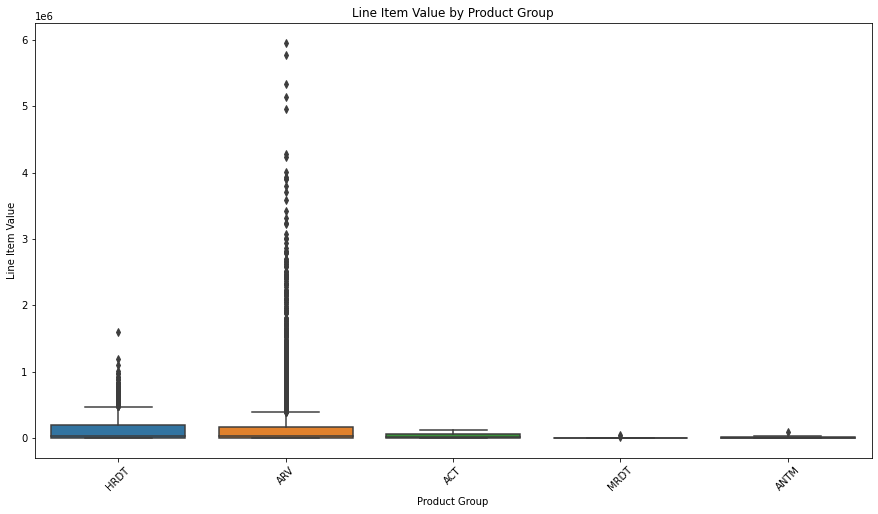

In [ ]:

# Create a box plot of the line item value by product group
data_pd = data.toPandas()
plt.figure(figsize=(15,8))
sns.boxplot(x='Product Group', y='Line Item Value', data=data_pd)
plt.title('Line Item Value by Product Group')
plt.xticks(rotation=45)
plt.show()

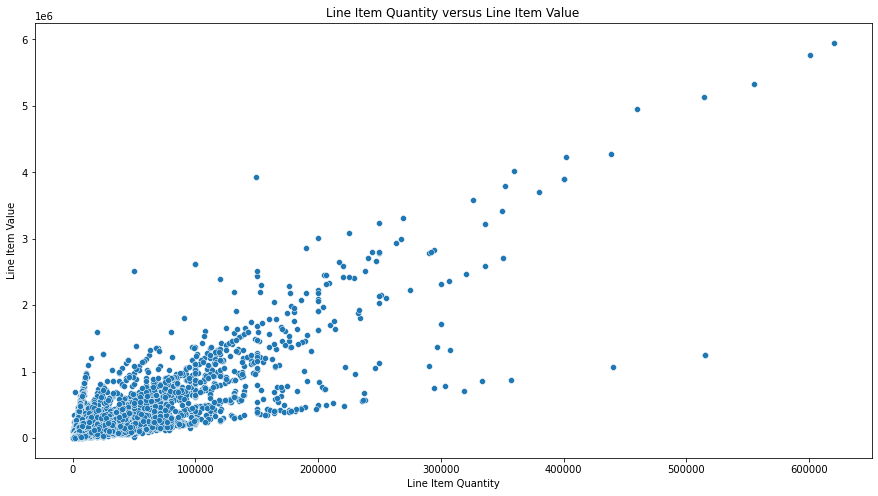

In [ ]:
# Create a scatter plot of the line item quantity versus line item value
plt.figure(figsize=(15,8))
sns.scatterplot(x='Line Item Quantity', y='Line Item Value', data=data_pd)
plt.title('Line Item Quantity versus Line Item Value')
plt.show()

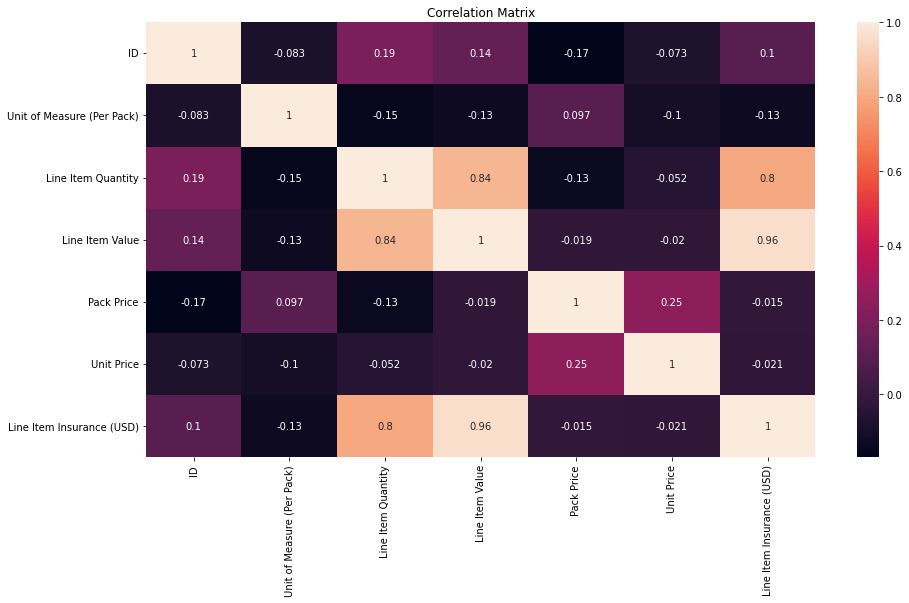

In [ ]:
# Correlation matrix plot
# corr = data.select([F.corr(col1, col2) for col1 in data.columns for col2 in data.columns]).collect()
# corr_matrix = np.array(corr).reshape(data.columns.size, data.columns.size)
# corr_df = pd.DataFrame(corr_matrix, index=data.columns, columns=data.columns)
plt.figure(figsize=(15,8))
sns.heatmap(data_pd.corr(), annot=True,)
plt.title('Correlation Matrix')
plt.show()

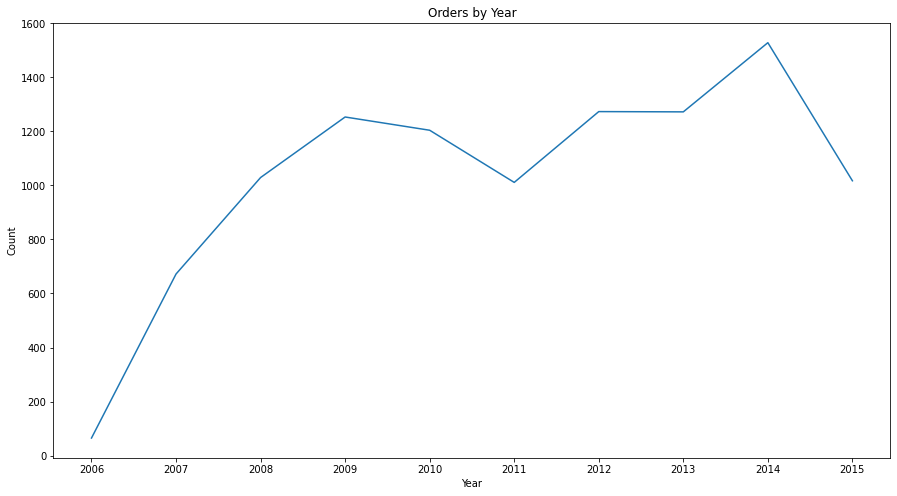

In [ ]:
# Convert Scheduled Delivery Date to date format
data = data.withColumn('Scheduled Delivery Date', to_date('Scheduled Delivery Date', 'dd-MMM-yy'))


# Visualize orders by year
plt.figure(figsize = (15,8))
year_counts = data.groupBy(year('Scheduled Delivery Date').alias('Year')).agg(count('*').alias('Count')).orderBy('Year').collect()
years = [str(row[0]) for row in year_counts]
counts = [row[1] for row in year_counts]
plt.plot(years, counts)
plt.title('Orders by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

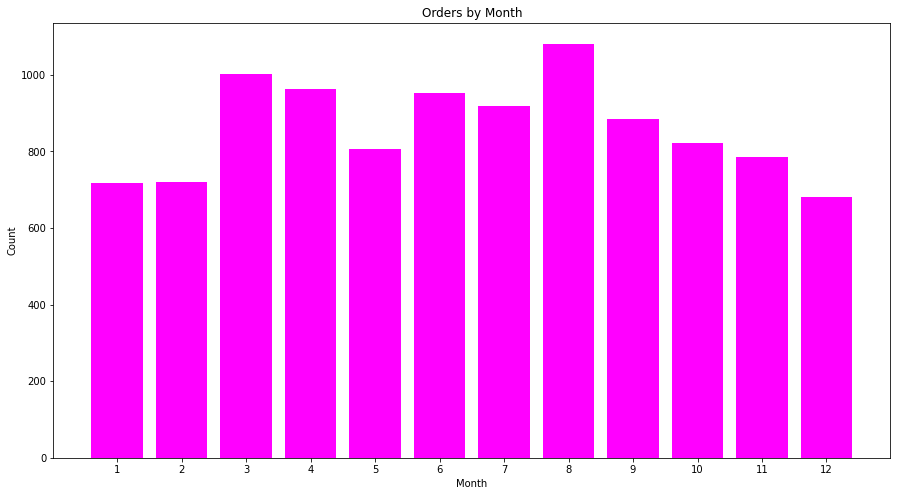

In [39]:
# Visualize orders by month
month_counts = data.groupBy(month('Scheduled Delivery Date').alias('Month')).agg(count('*').alias('Count')).orderBy('Month').collect()
months = [str(row[0]) for row in month_counts]
counts = [row[1] for row in month_counts]
plt.figure(figsize = (15,8))
plt.bar(months, counts,color = 'magenta')
plt.title('Orders by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

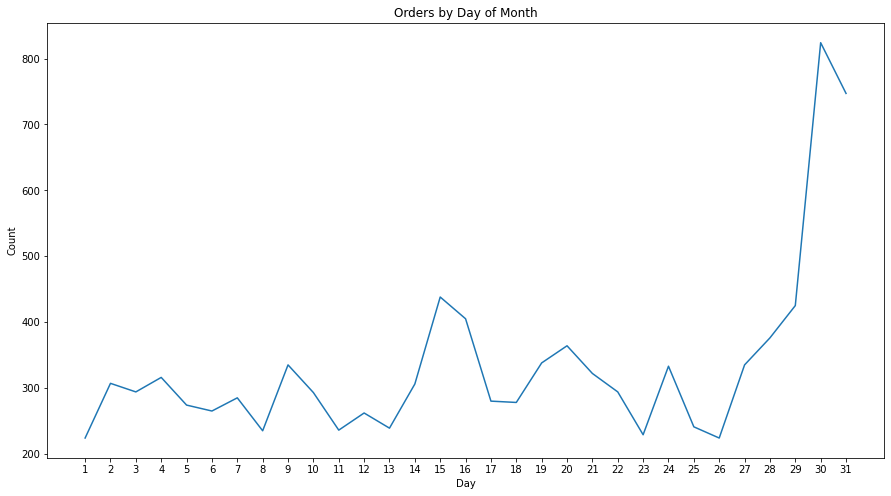

In [ ]:
# Visualize orders by day of month
day_counts = data.groupBy(dayofmonth('Scheduled Delivery Date').alias('Day')).agg(count('*').alias('Count')).orderBy('Day').collect()
days = [str(row[0]) for row in day_counts]
counts = [row[1] for row in day_counts]
plt.figure(figsize = (15,8))
sns.lineplot(x=days, y=counts)
plt.title('Orders by Day of Month')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

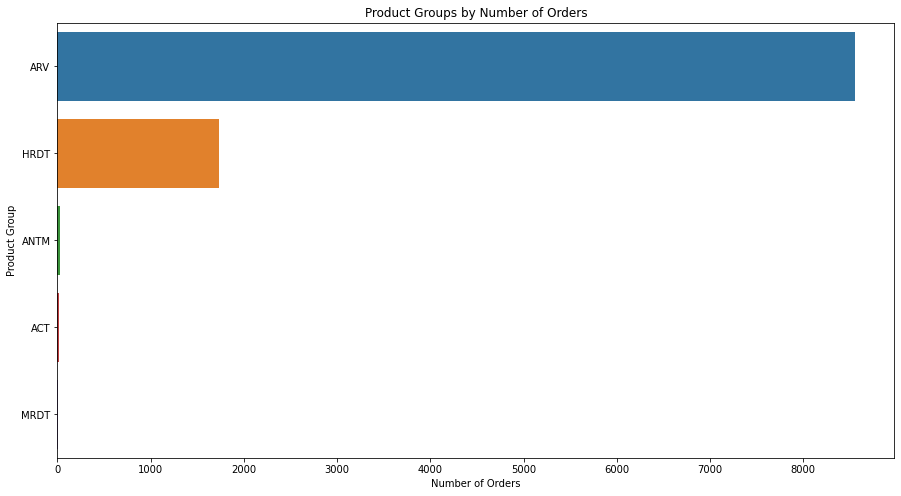

In [ ]:
# Visualize the distribution of product groups ordered:

product_group_counts = data.groupBy('Product Group').count().orderBy('count', ascending=False).toPandas()
plt.figure(figsize=(15,8))
sns.barplot(x='count', y='Product Group', data=product_group_counts)
plt.xlabel('Number of Orders')
plt.ylabel('Product Group')
plt.title('Product Groups by Number of Orders')
plt.show()


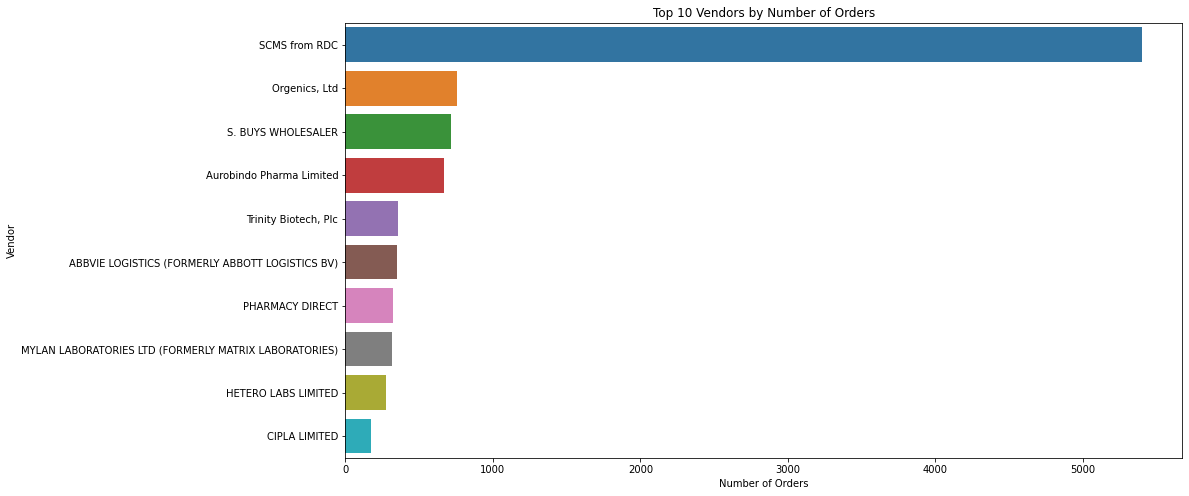

In [ ]:
# Visualize the distribution of vendors fulfilling orders:
vendor_counts = data.groupBy('Vendor').count().orderBy('count', ascending=False).limit(10).toPandas()
plt.figure(figsize = (15,8))
sns.barplot(x='count', y='Vendor', data=vendor_counts)
plt.xlabel('Number of Orders')
plt.ylabel('Vendor')
plt.title('Top 10 Vendors by Number of Orders')
plt.show()

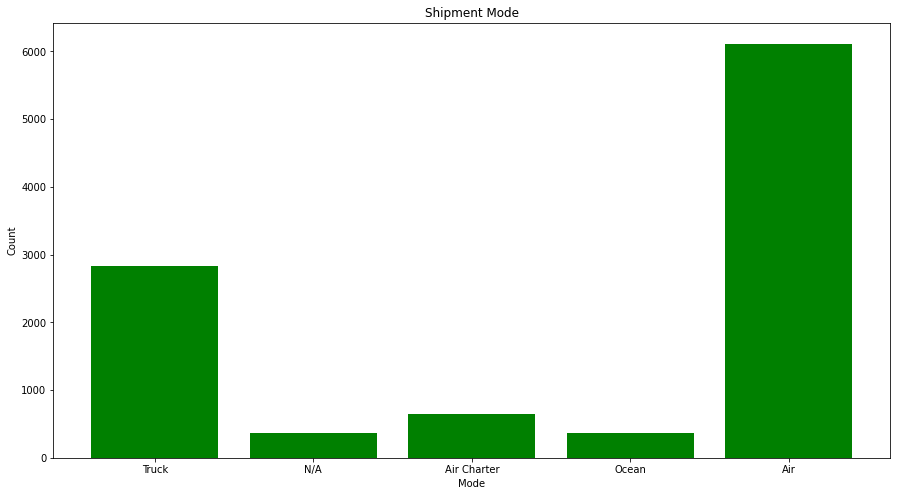

In [35]:

# Visualize shipment mode counts
mode_counts = data.groupBy('Shipment Mode').agg(count('*').alias('count')).collect()
mode_labels = [row[0] for row in mode_counts]
mode_values = [row[1] for row in mode_counts]
plt.figure(figsize = (15,8))
plt.bar(mode_labels, mode_values,color = 'green')
plt.title('Shipment Mode')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

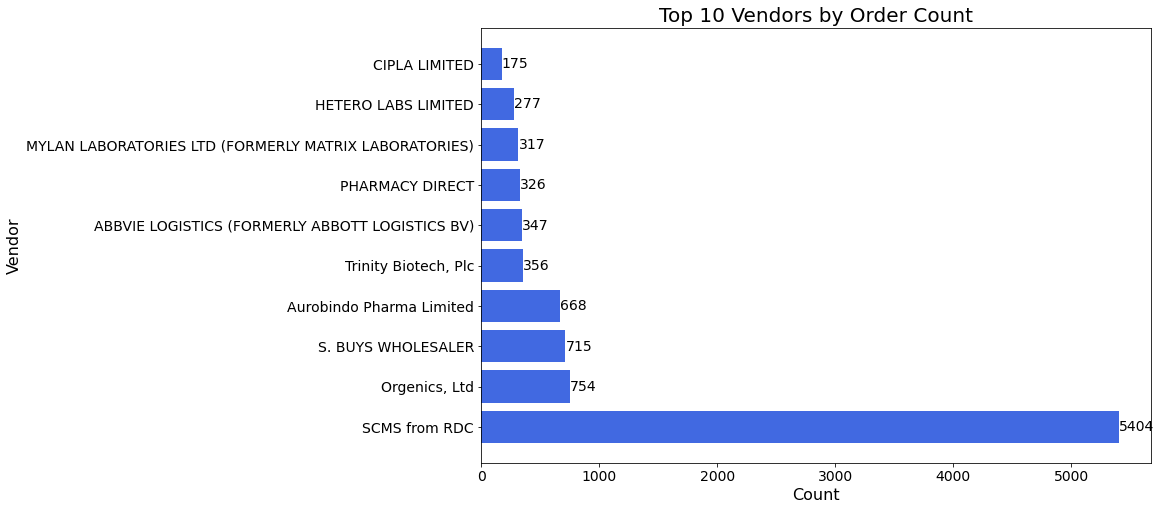

In [ ]:

# Bar plot of vendor counts
vendor_counts = data.groupBy('Vendor').agg(count('*').alias('count')).orderBy(desc('count')).limit(10).collect()
vendors = [str(row[0]) for row in vendor_counts]
counts = [row[1] for row in vendor_counts]

plt.figure(figsize=(12, 8))
plt.barh(vendors, counts, color='royalblue')
plt.title('Top 10 Vendors by Order Count', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Vendor', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for i, v in enumerate(counts):
    plt.text(v + 0.5, i - 0.1, str(v), fontsize=14, color='black')

plt.show()


<Axes: >

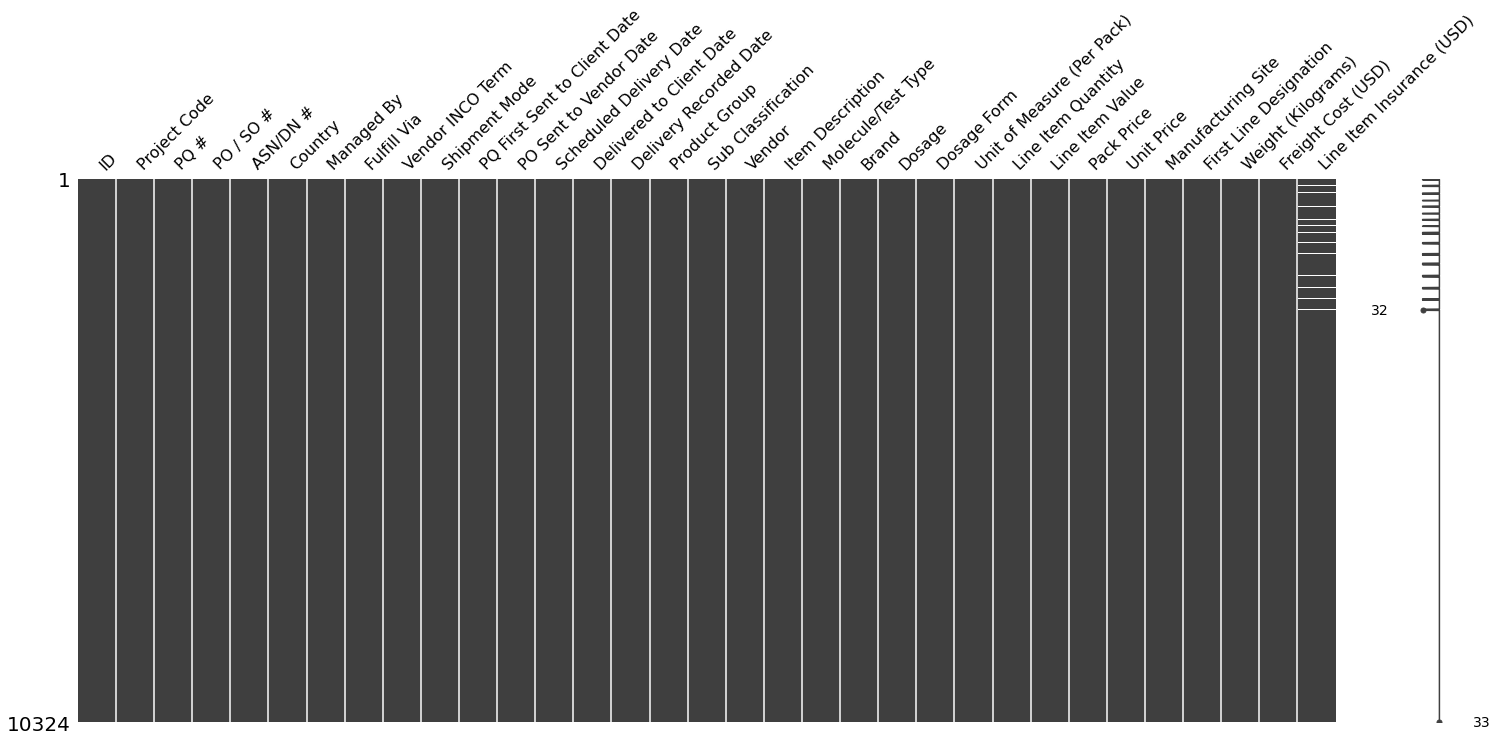

In [ ]:
import missingno as msno

# plot missing values using the missingno package
msno.matrix(data.toPandas())


In [ ]:
# Import required libraries
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Load data into a Spark DataFrame
df = spark.read.csv('SCMS_Delivery_History_Dataset.csv', header=True, inferSchema=True)
df = df.dropna()
# Select columns for modeling
selected_cols = ['Pack Price', 'Unit Price', 'Line Item Insurance (USD)', 'Line Item Quantity']
df = df.select(selected_cols)

# Convert columns to correct data types
df = df.withColumn("Line Item Quantity", col("Line Item Quantity").cast("double"))
df = df.withColumn("Pack Price", col("Pack Price").cast("double"))
df = df.withColumn("Unit Price", col("Unit Price").cast("double"))
df = df.withColumn("Line Item Insurance (USD)", col("Line Item Insurance (USD)").cast("double"))

# Create a vector assembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=["Pack Price", "Unit Price", "Line Item Insurance (USD)"], outputCol="features")

# Split data into training and test sets
(training_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Define the regression model to be used for the analysis
lr = LinearRegression(featuresCol="features", labelCol="Line Item Quantity")

# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="rmse")

# Train and evaluate the model using a pipeline
pipeline = Pipeline(stages=[assembler, lr])
trained_model = pipeline.fit(training_data)
predictions = trained_model.transform(test_data)
rmse_lr = evaluator.evaluate(predictions)
print("Linear Regression RMSE: {}".format(rmse_lr))

# To calculate R2
# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="r2")
r2_lr = evaluator.evaluate(predictions)
print("Linear Regression R2: {}".format(r2_lr))



Linear Regression RMSE: 26476.271071206193
Linear Regression R2: 0.6479978454201347


In [ ]:
# Import required libraries
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Load data into a Spark DataFrame
df = spark.read.csv('SCMS_Delivery_History_Dataset.csv', header=True, inferSchema=True)
df = df.dropna()
# Select columns for modeling
selected_cols = ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
                 'Shipment Mode', 'Product Group', 'Sub Classification', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
                 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)', 'Delivery Recorded Date']
df = df.select(selected_cols)

# Convert categorical variables into numerical variables
cat_cols = ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
            'Shipment Mode', 'Product Group', 'Sub Classification']
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in cat_cols]
encoders = [OneHotEncoder(inputCol=c+"_index", outputCol=c+"_vec") for c in cat_cols]

# Convert columns to correct data types
df = df.withColumn("Unit of Measure (Per Pack)", col("Unit of Measure (Per Pack)").cast("double"))
df = df.withColumn("Line Item Quantity", col("Line Item Quantity").cast("double"))
df = df.withColumn("Line Item Value", col("Line Item Value").cast("double"))
df = df.withColumn("Pack Price", col("Pack Price").cast("double"))
# df = df.withColumn("Unit Price", col("Unit Price").cast("double"))
df = df.withColumn("Line Item Insurance (USD)", col("Line Item Insurance (USD)").cast("double"))
df = df.withColumn('Delivery Recorded Date', to_date('Delivery Recorded Date', 'yyyy-MM-dd'))

# Create a vector assembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=["Project Code_vec", "PQ #_vec", "PO / SO #_vec", "ASN/DN #_vec", "Country_vec",
                                       "Managed By_vec", "Fulfill Via_vec", "Vendor INCO Term_vec", "Shipment Mode_vec",
                                       "Product Group_vec", "Sub Classification_vec", "Unit of Measure (Per Pack)",
                                       "Line Item Value", "Pack Price", "Unit Price",
                                       "Line Item Insurance (USD)"], outputCol="features")

# Split data into training and test sets
(training_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Define the regressor to be used for the analysis
rf = RandomForestRegressor(featuresCol="features", labelCol="Line Item Quantity", numTrees=10, maxDepth=5, seed=42)

# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="rmse")

# Train and evaluate the regressor using a pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])
trained_model = pipeline.fit(training_data)
predictions = trained_model.transform(test_data)
rmse_rf = evaluator.evaluate(predictions)
print("Random Forest Regression RMSE: {}".format(rmse_rf))

# To calculate R2
# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="r2")
r2_rf = evaluator.evaluate(predictions)
print("Random Forest Regression R2: {}".format(r2_rf))


Random Forest Regression RMSE: 18176.740312718888
Random Forest Regression R2: 0.7845197710611714


In [ ]:
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Load data into a Spark DataFrame
df = spark.read.csv('SCMS_Delivery_History_Dataset.csv', header=True, inferSchema=True)
df = df.dropna()

# Select columns for modeling
selected_cols = ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
                 'Shipment Mode', 'Product Group', 'Sub Classification', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
                 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)', 'Delivery Recorded Date']
df = df.select(selected_cols)

# Convert categorical variables into numerical variables
cat_cols = ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
            'Shipment Mode', 'Product Group', 'Sub Classification']
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in cat_cols]
encoders = [OneHotEncoder(inputCol=c+"_index", outputCol=c+"_vec") for c in cat_cols]

# Convert columns to correct data types
df = df.withColumn("Unit of Measure (Per Pack)", col("Unit of Measure (Per Pack)").cast("double"))
df = df.withColumn("Line Item Quantity", col("Line Item Quantity").cast("double"))
df = df.withColumn("Line Item Value", col("Line Item Value").cast("double"))
df = df.withColumn("Pack Price", col("Pack Price").cast("double"))
# df = df.withColumn("Unit Price", col("Unit Price").cast("double"))
df = df.withColumn("Line Item Insurance (USD)", col("Line Item Insurance (USD)").cast("double"))
df = df.withColumn('Delivery Recorded Date', to_date('Delivery Recorded Date', 'yyyy-MM-dd'))

# Create a vector assembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=["Project Code_vec", "PQ #_vec", "PO / SO #_vec", "ASN/DN #_vec", "Country_vec",
                                       "Managed By_vec", "Fulfill Via_vec", "Vendor INCO Term_vec", "Shipment Mode_vec",
                                       "Product Group_vec", "Sub Classification_vec", "Unit of Measure (Per Pack)",
                                       "Line Item Value", "Pack Price", "Unit Price",
                                       "Line Item Insurance (USD)"], outputCol="features")

# Split data into training and test sets
(training_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Define the regressor to be used for the analysis
cart = DecisionTreeRegressor(featuresCol="features", labelCol="Line Item Quantity", maxDepth=5, seed=42)

# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="rmse")

# Train and evaluate the regressor using a pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, cart])
trained_model = pipeline.fit(training_data)
predictions = trained_model.transform(test_data)
rmse_cart= evaluator.evaluate(predictions)
print("Decision Tree Regression RMSE: {}".format(rmse_cart))

# To calculate R2
# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="r2")
r2_cart = evaluator.evaluate(predictions)
print("Decision Tree Regression R2: {}".format(r2_cart))



Decision Tree Regression RMSE: 15715.998256613175
Decision Tree Regression R2: 0.838913417825145


In [ ]:
# Import required libraries
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Load data into a Spark DataFrame
df = spark.read.csv('SCMS_Delivery_History_Dataset.csv', header=True, inferSchema=True)
df = df.dropna()

# Select columns for modeling
selected_cols = ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
                 'Shipment Mode', 'Product Group', 'Sub Classification', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
                 'Line Item Value', 'Pack Price', 'Unit Price', 'Line Item Insurance (USD)', 'Delivery Recorded Date']
df = df.select(selected_cols)

# Convert categorical variables into numerical variables
cat_cols = ['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term',
            'Shipment Mode', 'Product Group', 'Sub Classification']
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in cat_cols]
encoders = [OneHotEncoder(inputCol=c+"_index", outputCol=c+"_vec") for c in cat_cols]

# Convert columns to correct data types
df = df.withColumn("Unit of Measure (Per Pack)", col("Unit of Measure (Per Pack)").cast("double"))
df = df.withColumn("Line Item Quantity", col("Line Item Quantity").cast("double"))
df = df.withColumn("Line Item Value", col("Line Item Value").cast("double"))
df = df.withColumn("Pack Price", col("Pack Price").cast("double"))
df = df.withColumn("Line Item Insurance (USD)", col("Line Item Insurance (USD)").cast("double"))
df = df.withColumn('Delivery Recorded Date', to_date('Delivery Recorded Date', 'yyyy-MM-dd'))

# Create a vector assembler to combine features into a single vector column
assembler = VectorAssembler(inputCols=["Project Code_vec", "PQ #_vec", "PO / SO #_vec", "ASN/DN #_vec", "Country_vec",
                                       "Managed By_vec", "Fulfill Via_vec", "Vendor INCO Term_vec", "Shipment Mode_vec",
                                       "Product Group_vec", "Sub Classification_vec", "Unit of Measure (Per Pack)",
                                       "Line Item Value", "Pack Price", "Unit Price",
                                       "Line Item Insurance (USD)"], outputCol="features")

# Split data into training and test sets
(training_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Define the regressor to be used for the analysis
gbt =GBTRegressor(featuresCol="features", labelCol="Line Item Quantity")

# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="rmse")

# Train and evaluate the regressor using a pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, gbt])
trained_model = pipeline.fit(training_data)
predictions = trained_model.transform(test_data)
rmse_gbt= evaluator.evaluate(predictions)
print("Gradient boosted Tree Regression RMSE: {}".format(rmse_gbt))

# To calculate R2
# Define the evaluator to be used for the analysis
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="Line Item Quantity", metricName="r2")
r2_gbt = evaluator.evaluate(predictions)
print("Gradient boosted Tree Regression R2: {}".format(r2_gbt))


Gradient boosted Tree Regression RMSE: 15369.252764363846
Gradient boosted Tree Regression R2: 0.8459431798895976


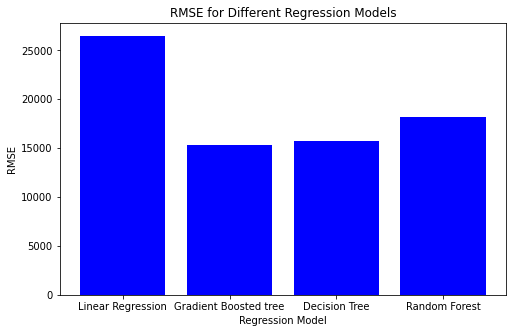

In [31]:

import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [rmse_lr, rmse_gbt, rmse_cart, rmse_rf]

# Model names
model_names = ['Linear Regression', 'Gradient Boosted tree','Decision Tree', 'Random Forest']

# Plot RMSE values
plt.figure(figsize=(8, 5))
plt.bar(model_names, rmse_values, color='blue')
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('RMSE for Different Regression Models')
plt.show()


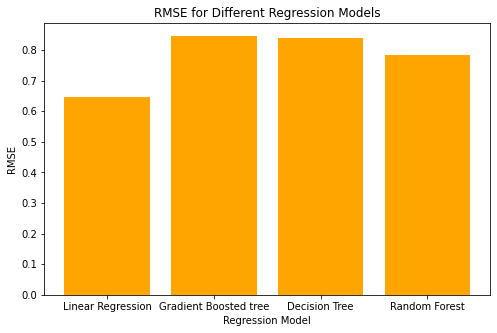

In [34]:
# R2 values for each model
r2_values = [r2_lr, r2_gbt, r2_cart, r2_rf]

# Model names
model_names = ['Linear Regression', 'Gradient Boosted tree','Decision Tree', 'Random Forest']

# Plot R2 values
plt.figure(figsize=(8, 5))
plt.bar(model_names, r2_values, color='orange')
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('RMSE for Different Regression Models')
plt.show()
